20163228 Yuseon Nam

In [1]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import math
from numpy.linalg import *

In [2]:
# Init Function1
def init_func(x) :
    y = x**3 - 16*x
    return y

def init_noise(x_domain) :
    
    noise_y = np.zeros(len(x_domain), dtype=float)
    
    for i in range(len(x_domain)) :
        x = x_domain[i]
        noise_y[i] = init_func(x) + random.uniform(-30, 30)
        
    return noise_y

# Init Function2
def init_func2(x) :
    y = (x**2 - 9) * (x**2 - 36)
    return y

def init_noise2(x_domain) :
    
    noise_y = np.zeros(len(x_domain), dtype=float)
    
    for i in range(len(x_domain)) :
        x = x_domain[i]
        noise_y[i] = init_func2(x) + random.uniform(-200, 200)
        
    return noise_y


def plot_points_func(domain_x, domain_y, noise_y, degree) :
    plt.scatter(domain_x, noise_y, c='r', s=5)
    plt.plot(domain_x, domain_y)
    
    if (degree == 0) :
        plt.title("Original Polynomial")
    else :
        plt.title("Degree : " + str(degree))
    
    plt.show()

In [3]:
# Class
class LeastSquare() :
    def __init__(self, degree, x_domain, y_domain) :
        self.degree = degree + 1
        self.noise_x = x_domain
        self.n = len(self.noise_x)
        
        self.noise_y = np.array(y_domain)
        self.noise_y = self.noise_y.reshape(self.n, 1)
        
        
    def calculate_matrix_a(self) :
        self.matrix_a = np.zeros((self.n, self.degree), dtype=float)
        
        for i in range (self.n) :
            for j in range (self.degree) :
                self.matrix_a[i][j] = self.noise_x[i] ** j
        
        
    def pseudo_inverse(self) :
        
        self.calculate_matrix_a()
        
        trans_a = self.matrix_a.T        
        ata = np.mat(trans_a) * np.mat(self.matrix_a)
        aiat = np.mat(ata.I) * np.mat(trans_a)
        
        self.coeff = np.mat(aiat) * np.mat(self.noise_y)
        self.reshape_coeff()
        
        
    def reshape_coeff(self) :
        prev_coeff = copy.deepcopy(self.coeff)
        self.coeff = np.zeros(self.degree, dtype=float)
        
        for i in range (len(prev_coeff)) :
            self.coeff[i] = prev_coeff[i][0]
            
#         print(self.coeff)
        
        
    def poly_func(self, x) :
        y = 0
        
        for i in range (self.degree) :
            y += self.coeff[i] * (x ** i)
        
        return y
    
    
    def cal_domain_y(self) :
        self.y_domain = [self.poly_func(i) for i in self.noise_x]
        
        return self.y_domain
    
    def calculate_residual(self) :
        residual = 0
        
        for i in range (self.n) :
            residual += (self.y_domain[i] - self.noise_y[i][0]) ** 2
            
#         print(residual)
        return residual

In [4]:
ls_degree=[1, 2, 3, 5, 9]
ls_y = []
residual_list = []

def do_least_square(degree) :
    least_square = LeastSquare(degree, x_domain, initial_noise)
    least_square.pseudo_inverse()
    
    ls_y.append(least_square.cal_domain_y())
    residual_list.append(least_square.calculate_residual())
    plot_points_func(x_domain, least_square.cal_domain_y(), initial_noise, degree)

# $y = x^3 -16x$

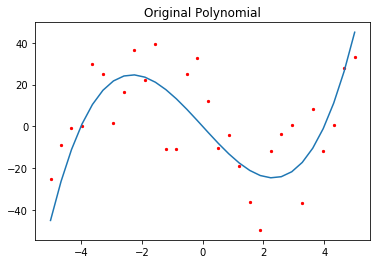

In [5]:
# Main 1
x_domain = np.linspace(-5, 5, 30)
y_domain = [init_func(i) for i in x_domain]

initial_noise = init_noise(x_domain)

plot_points_func(x_domain, y_domain, initial_noise, 0)

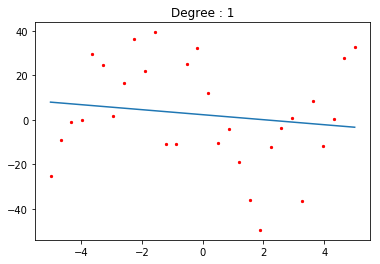

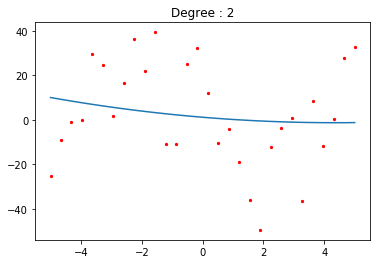

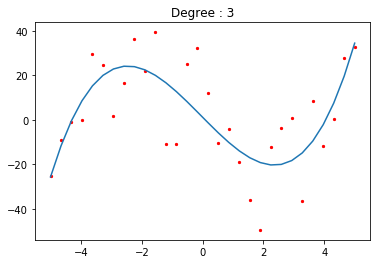

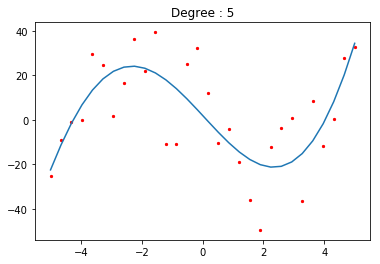

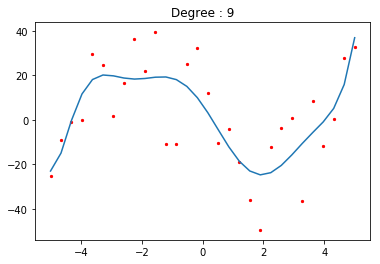

In [6]:
for i in ls_degree :
    do_least_square(i)

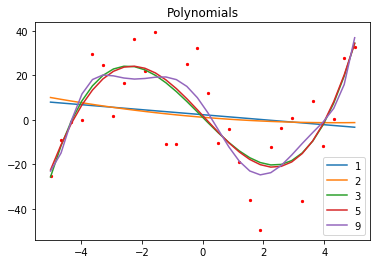

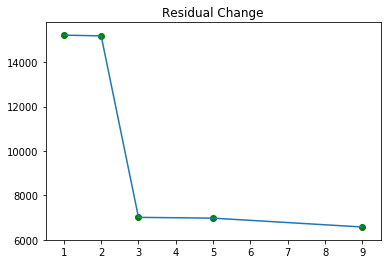

In [7]:
plt.title("Polynomials")
plt.scatter(x_domain, initial_noise, c='r', s=5)
for i in range(len(ls_y)):
    plt.plot(x_domain, ls_y[i])
plt.legend(ls_degree)
plt.show()

plt.title("Residual Change")
plt.plot(ls_degree, residual_list)
plt.scatter(ls_degree,residual_list, c='g')
plt.show()

# $y = (x - 3)(x + 3)(x - 6)(x + 6)$

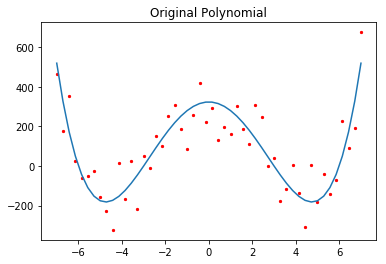

In [8]:
ls_y = []
residual_list = []

# Main 2
x_domain = np.linspace(-7, 7, 50)
y_domain = [init_func2(i) for i in x_domain]

initial_noise = init_noise2(x_domain)

plot_points_func(x_domain, y_domain, initial_noise, 0)

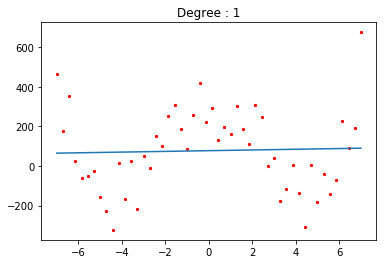

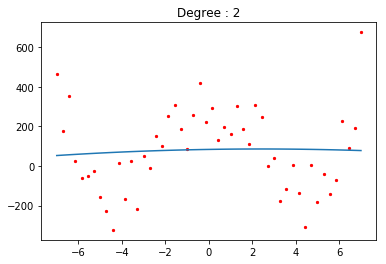

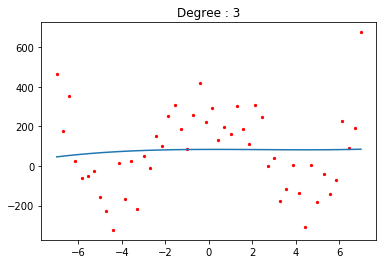

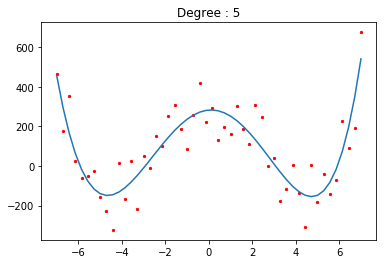

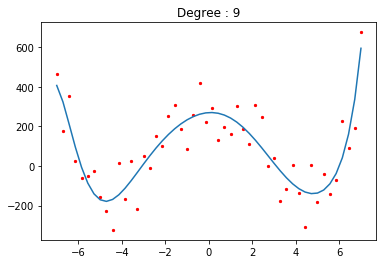

In [9]:
for i in ls_degree :
    do_least_square(i)

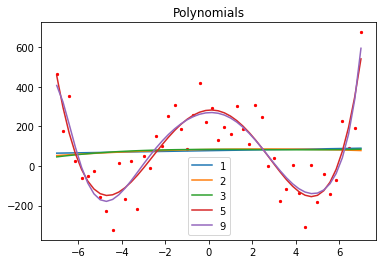

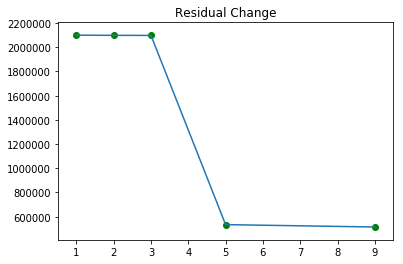

In [10]:
plt.title("Polynomials")
plt.scatter(x_domain, initial_noise, c='r', s=5)
for i in range(len(ls_y)):
    plt.plot(x_domain, ls_y[i])
plt.legend(ls_degree)
plt.show()

plt.title("Residual Change")
plt.plot(ls_degree, residual_list)
plt.scatter(ls_degree,residual_list, c='g')
plt.show()